1. ***PROJECT SET UP*** 

 Optimal Used Car Pricing and Recommendation System

1.1 Introduction

The used car market is growing rapidly, but it often lacks transparency due to inconsistent pricing across regions, brands, and vehicle conditions. This project addresses these challenges by using machine learning to predict optimal prices and recommend similar vehicles based on user preferences. This approach aims to help users make informed choices quickly and with greater confidence.

1.2 Problem Statement

The used car market presents unique challenges, such as:

Price Discrepancies: Variations in price by location, brand, age, and condition make it difficult for buyers and sellers to evaluate fair prices.
Lack of Guidance: Buyers often lack tools to find comparable options, resulting in suboptimal purchase decisions.

This project intends to:

Predict used car prices with high accuracy.
Recommend similar cars based on user-defined preferences.
Provide region-specific insights to refine pricing and optimize listing strategies.

1.3 Objectives

Main Objective: Develop a machine learning system for accurate price predictions and vehicle recommendations, enhancing the transparency and efficiency of the used car market.

Specific Objectives:

Predict optimal car prices using machine learning algorithms.
Recommend similar cars based on criteria like make, model, and price.
Provide location-specific pricing insights to inform listing strategies.
Build an interactive dashboard for user-friendly predictions and recommendations.

1.4 Data Sources

The project relies on multiple data sources:

Internal Data: Datasets provided by the organization, segmented by region and containing various vehicle attributes.
External Data (Optional): Supplemental data from public sources (e.g., Kaggle datasets) to diversify and enrich the dataset.
Web Scraped Data: Data from online used car listings to enhance model accuracy and provide up-to-date market trends.

1.5 Assumptions

Data Quality: All datasets are assumed to be reliable, containing accurate information about car prices, mileage, age, fuel type, and other attributes.
Regional Variation: It’s assumed that regional data is comprehensive enough to reflect pricing trends in specific areas accurately.
Feature Selection: The chosen features (e.g., mileage, brand, age) are assumed to significantly impact car prices and user preferences.

1.6 Limitations

Model Accuracy: Predictive accuracy may vary depending on data completeness and regional representation. The model may perform less accurately in regions with limited data.
Outliers: Extreme values in pricing, mileage, or condition can distort predictions, especially in rare car models or luxury segments.
External Data Quality: Public datasets may have discrepancies, leading to potential biases in predictions if not properly cleaned and standardized.

1.7 Target Audience

The pricing and recommendation system primarily benefits:

Buyers: Helping them find fair prices and explore similar options, enhancing decision-making.
Sellers: Providing pricing benchmarks and recommended listings to attract potential buyers.
Dealerships: Enabling dealerships to adjust prices based on data-driven insights, optimizing sales strategies.
Marketplaces: Online car marketplaces can integrate this tool to improve user experience and transparency.


2. ***INITIAL DATA EXPLORATION***

2.1. Preview the Data
•	Consolidating the datasets 


In [522]:
# Importing Required libraies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')


In [523]:
# Load individual region data files
Ahmedabad_data = pd.read_csv('Ahmedabad.csv')
Banglore_data = pd.read_csv('Banglore.csv')
Car_data = pd.read_csv('Car_data.csv')
Chennai_data = pd.read_csv('Chennai.csv')
Gurgaon_data = pd.read_csv('Gurgaon.csv')
Hyderabad_data = pd.read_csv('Hyderabad.csv')
Jaipur_data = pd.read_csv('Jaipur.csv')
Kolkata_data = pd.read_csv('Kolkata.csv')
Mumbai_data = pd.read_csv('Mumbai.csv')
Pune_data = pd.read_csv('Pune.csv')

# Combine all the data into one DataFrame
combined_data = pd.concat([Ahmedabad_data, Banglore_data, Car_data, Chennai_data, Gurgaon_data, Hyderabad_data, Jaipur_data, Kolkata_data, Mumbai_data, Pune_data], ignore_index=True)

# Renaming combined data for simplicity
Data = combined_data


In [524]:
# Check the shape of the Data
print(Data.shape)


(10394, 21)


In [525]:
Data.head()


,Unnamed: 0,Brand,Make_Year,Fuel,KMs_Driven,Engine_Displacement,No_Of_Owner,Transmission,Mileage,Max_Power,...,Seats,Color,Gear_Box,Drive_Type,Steering_Type,Front_Brake_Type,Rear_Brake_Type,Acceleration,Engine_Type,Price
0,0,2020 Maruti Swift Dzire,2019,Petrol,"11,935 Kms",1197 cc,1st Owner,Manual,21.21 kmpl,81.80bhp,...,5,Grey,5 Speed,FWD,Power,Disc,Drum,12.6 Seconds,K Series VVT Engine,"6,80,000"
1,1,2016 Nissan Terrano,2016,Diesel,"74,555 Kms",1461 cc,2nd Owner,Manual,20.45 kmpl,83.8bhp,...,5,Black,5 Speed,FWD,Power,Disc,Drum,14 Seconds,K9K Diesel Engine,"4,70,500"
2,2,2020 Maruti Swift Dzire,2019,Petrol,"9,379 Kms",1197 cc,1st Owner,Manual,21.21 kmpl,81.80bhp,...,5,White,5 Speed,FWD,Power,Disc,Drum,12.6 Seconds,K Series VVT Engine,"6,75,000"
3,3,2018 Maruti Swift,2018,Diesel,"31,824 Kms",1248 cc,1st Owner,Manual,28.4 kmpl,74bhp,...,5,Red,5,FWD,Power,Disc,Drum,NaN,DDiS 190 Engine,"6,00,000"
4,4,2017 Maruti Baleno,2017,Petrol,"49,072 Kms",1197 cc,1st Owner,Manual,21.01 kmpl,81.80bhp,...,5,Blue,5 Speed,FWD,Electric,Disc,Drum,12.36 seconds,1.2L VVT Engine,"6,10,000"


Inspecting the Data: Check data types, null values, and the general structure of the dataset.

In [526]:
Data.info()  # Shows data types and missing values



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10394 entries, 0 to 10393
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           10394 non-null  int64 
 1   Brand                10394 non-null  object
 2   Make_Year            10394 non-null  int64 
 3   Fuel                 10394 non-null  object
 4   KMs_Driven           10394 non-null  object
 5   Engine_Displacement  10394 non-null  object
 6   No_Of_Owner          10394 non-null  object
 7   Transmission         10394 non-null  object
 8   Mileage              10394 non-null  object
 9   Max_Power            10394 non-null  object
 10  Torque               10394 non-null  object
 11  Seats                10394 non-null  int64 
 12  Color                10394 non-null  object
 13  Gear_Box             10386 non-null  object
 14  Drive_Type           10208 non-null  object
 15  Steering_Type        10344 non-null  object
 16  Fron

**DataFrame Summary**

Total Entries: 10,394 rows (indexed from 0 to 10,393).

Total Columns: 21 columns.

**Column Details**

**Data Types:**

int64: 3 columns (e.g., Unnamed: 0, Make_Year, Seats).

object: 18 columns (e.g., Brand, Fuel, KMs_Driven, etc.).

**Non-Null Counts**

Most columns have 10,394 non-null entries, indicating no missing values.

Some columns have missing values:

Gear_Box: 10,386 non-null entries.

Drive_Type: 10,208 non-null entries.

Steering_Type: 10,344 non-null entries.

Front_Brake_Type: 10,346 non-null entries.

Rear_Brake_Type: 10,346 non-null entries.

Acceleration: 9,320 non-null entries.

Engine_Type: 5,144 non-null entries.


**Conclusion**
The DataFrame contains a mix of integer and object data types, with some columns having missing values. Most columns are fully populated, while a few require attention for missing data.

**Initial EDA**

Visualizations: To create plots to visualize relationships between features and the target variable (e.g., price).

To understand distributions, correlations, and trends in the data.

Feature Importance: Identify which features are most important for predicting the target variable.

In [527]:
# Display summary statics
Data.describe()

,Unnamed: 0,Make_Year,Seats
count,10394.000000,10394.000000,10394.000000
mean,1460.271984,2014.891861,5.188378
std,1563.455786,3.094559,0.653699
min,0.000000,1995.000000,2.000000
25%,262.000000,2013.000000,5.000000
50%,594.000000,2015.000000,5.000000
75%,2597.750000,2017.000000,5.000000
max,5196.000000,2021.000000,9.000000


*The dataset includes information on 5,197 vehicles, with the following key statistics:*

Make Year: The average vehicle age is 2014, ranging from 1995 to 2021.

KMs Driven: The average mileage is 59,076 km, with a wide range from 200 km to over 2 million km.

Engine Displacement: The mean engine displacement is 1,378 cc, with a standard deviation of 457 cc, indicating a mix of small and large engines.

Number of Owners: There are up to 5,461 owners, with values skewed toward lower numbers of ownership.

Mileage: Average mileage is 25.88 km/l, with a significant spread from 0 to 260 km/l.

Max Power: The average power is 92.13 HP, ranging from 0 to 469 HP.

Seats: Most vehicles have 5 seats, though some models have up to 9.

Price: The average price is approximately ₹675,948, with prices ranging from ₹45,000 to ₹9.5 million.

Exploratory Data Analysis (EDA)

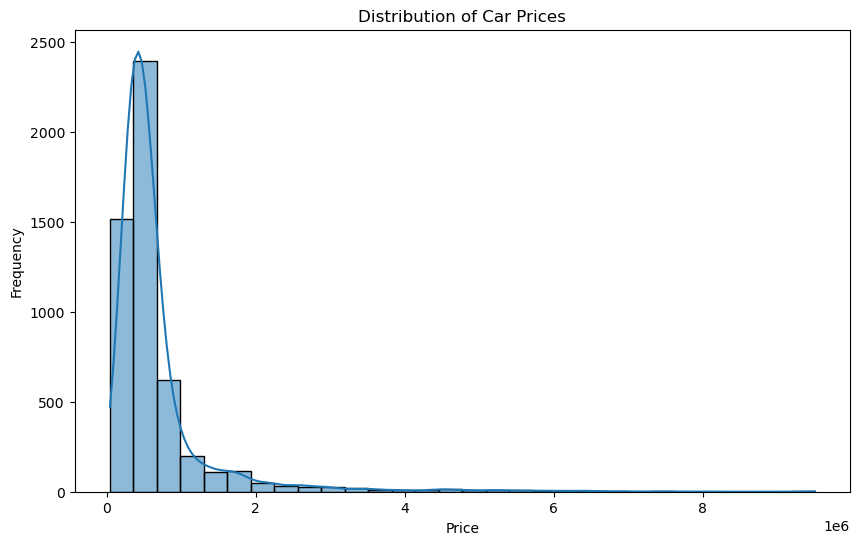

In [528]:
#Data Visualization
#Distribution of Numerical Features: Using histograms to visualize the distribution of numerical features.
# Convert 'Price' to numeric values, forcing errors to NaN
Data['Price'] = pd.to_numeric(Data['Price'], errors='coerce')

# Drop rows with NaN values in 'Price' (optional, based on our preference)
Data = Data.dropna(subset=['Price'])

# Now plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(Data['Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


- The histogram shows the distribution of car prices. The presence of a right skew indicates that most cars are priced lower, with fewer high-priced vehicles.
The kernel density estimate (KDE) line helps visualize the probability density of the prices, suggesting that the majority of cars fall within a specific price range, while a few are significantly more expensive.

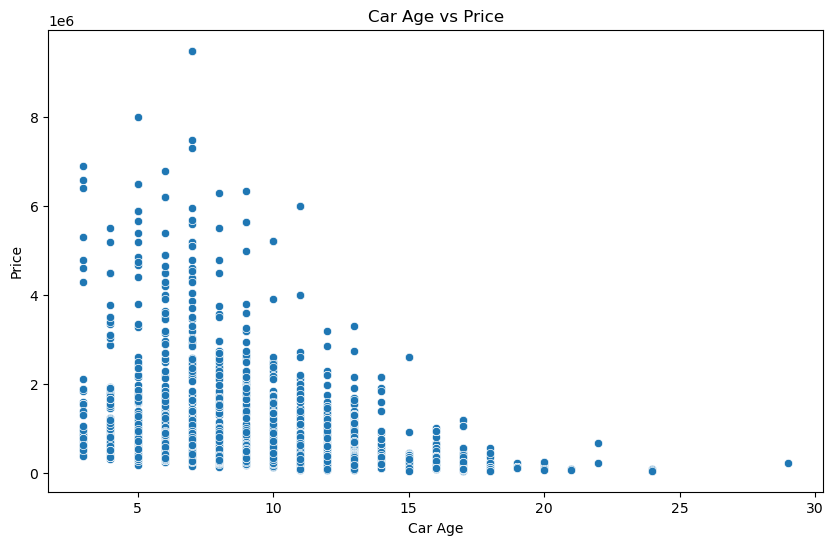

In [529]:
# Scatter plot for Car Age vs Price
Data['Car_Age'] = 2024 - Data['Make_Year']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Car_Age', y='Price', data=Data)
plt.title('Car Age vs Price')
plt.xlabel('Car Age')
plt.ylabel('Price')
plt.show()


The scatter plot illustrates the relationship between car age and price. Generally, as the car age increases, the price tends to decrease, indicating depreciation. However, there may be some outliers where older cars retain higher values, possibly due to brand, condition, or rarity.

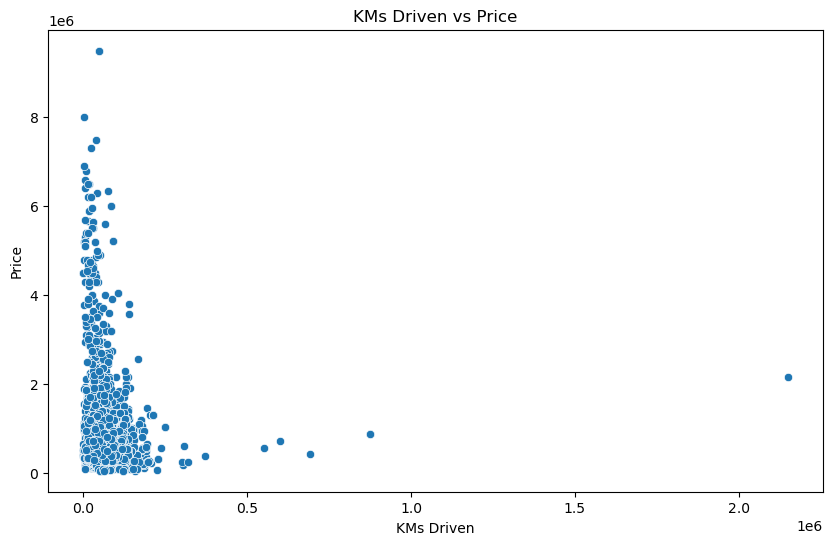

In [530]:
#Scatter Plot: Visualize the relationship between two numerical features.
# Scatter plot of KMs_Driven vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Data, x='KMs_Driven', y='Price')
plt.title('KMs Driven vs Price')
plt.xlabel('KMs Driven')
plt.ylabel('Price')
plt.show()

This scatter plot shows the relationship between kilometers driven and price. There is a general trend where higher mileage correlates with lower prices, suggesting that cars with more kilometers driven are less valuable. However, there are exceptions, particularly for well-maintained vehicles that may still command higher prices despite high mileage.

In [531]:
Data.columns

Index(['Unnamed: 0', 'Brand', 'Make_Year', 'Fuel', 'KMs_Driven',
       'Engine_Displacement', 'No_Of_Owner', 'Transmission', 'Mileage',
       'Max_Power', 'Torque', 'Seats', 'Color', 'Gear_Box', 'Drive_Type',
       'Steering_Type', 'Front_Brake_Type', 'Rear_Brake_Type', 'Acceleration',
       'Engine_Type', 'Price', 'Car_Age'],
      dtype='object')

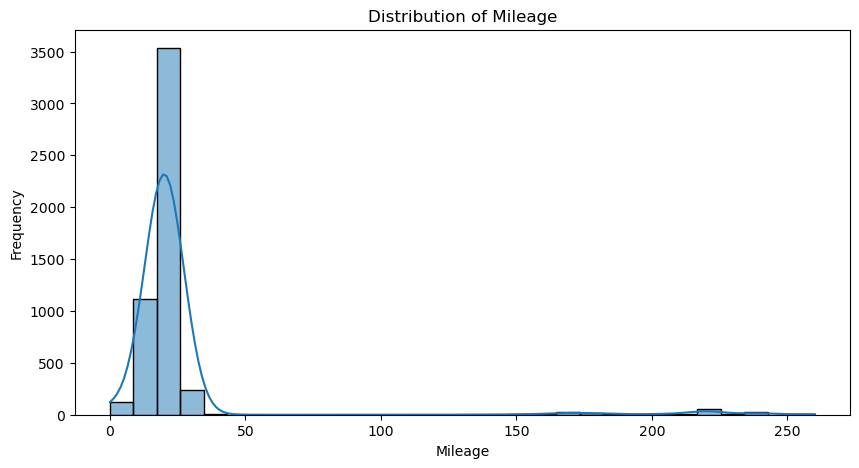

In [532]:
# Mileage distribution
plt.figure(figsize=(10, 5))
sns.histplot(Data['Mileage'], kde=True, bins=30)
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()


Insights: The histogram indicates the distribution of mileage across the dataset. The presence of a peak suggests that most vehicles have a mileage within a certain range, with fewer vehicles achieving very high or very low mileage. The KDE line provides a clearer view of the distribution shape.

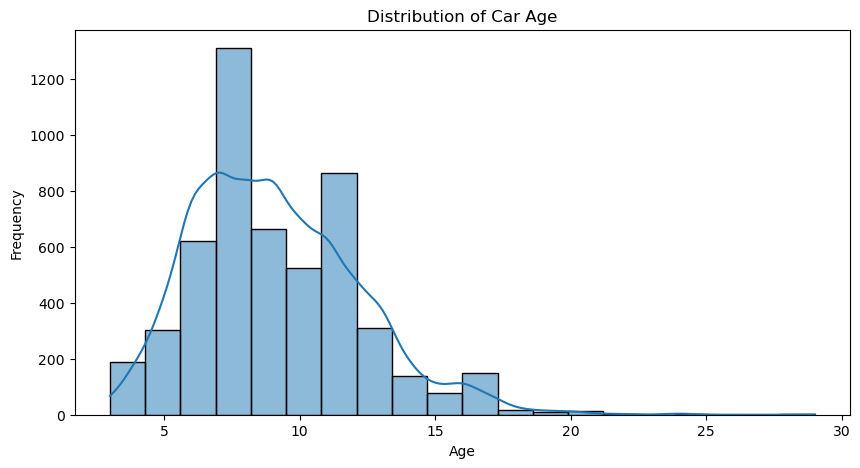

In [533]:

# Age distribution
plt.figure(figsize=(10, 5))
sns.histplot(Data['Car_Age'], kde=True, bins=20)
plt.title('Distribution of Car Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


This plot shows the distribution of car ages. The data likely indicates that most cars are relatively new, with fewer older models. The KDE line helps visualize the age distribution, suggesting a preference or availability of newer vehicles in the market.

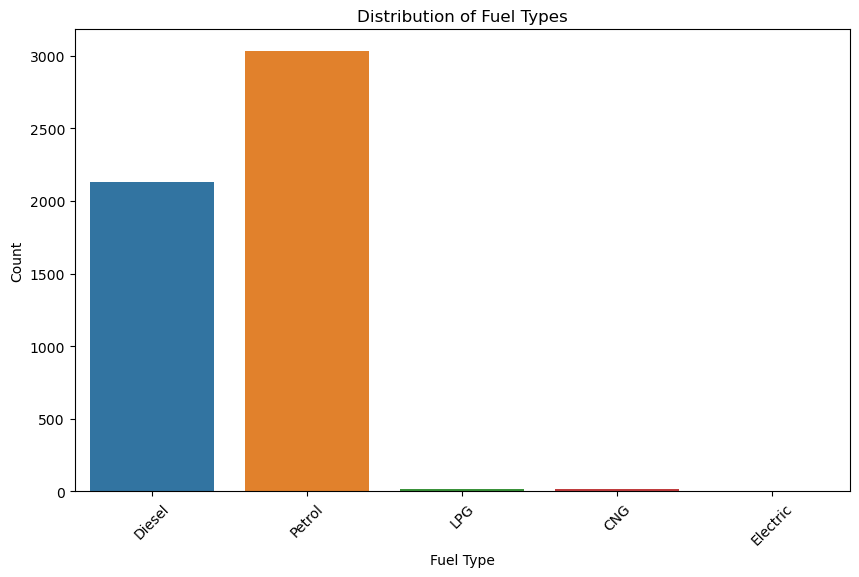

In [534]:
# Categorical Analysis
# Count plot for the 'Fuel' column
plt.figure(figsize=(10, 6))
sns.countplot(data=Data, x='Fuel')
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In the plot above, we see the distribution of various fuel types for the vehicles in our dataset. Here's a breakdown of the insights:

Petrol: This fuel type has the highest count, exceeding 3,000. This suggests that petrol vehicles are the most common in the dataset.

Diesel: Diesel vehicles are also quite common, with over 2,000 entries, making them the second most frequent fuel type after petrol.

Other Fuel Types (LPG, CNG, Electric): These fuel types have very low counts, close to zero compared to petrol and diesel. This indicates that vehicles with these alternative fuel types are rare in our dataset.

Key Takeaways

Market Composition: Petrol and diesel vehicles dominate the dataset, which may reflect general market trends or the specific focus of our data collection.

Low Representation of Alternative Fuels: The small counts of LPG, CNG, and electric vehicles suggest limited representation of these types. This might impact analyses if you want to include these fuels in comparative studies due to sample size limitations.

Further Analysis: It may be valuable to investigate other factors, such as vehicle age, mileage, or brand, in relation to fuel type to gain deeper insights into each category.

The count plot reveals the distribution of different fuel types in the dataset. Petrol and diesel vehicles dominate, indicating their popularity in the market. The low counts for alternative fuel types (like LPG, CNG, and electric) suggest limited representation, which may impact analyses focused on fuel type.

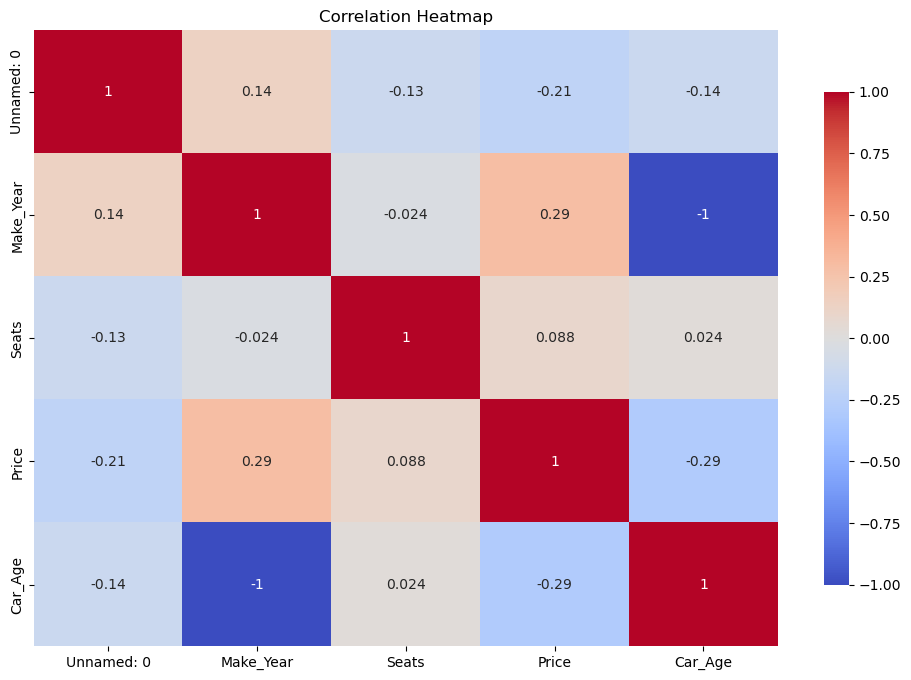

In [535]:
#Correlation Analysis
#Correlation Heatmap to visualize the correlation between numerical features.
# Select only numeric columns
numeric_cols = Data.select_dtypes(include=['float64', 'int64']).columns
Data_numeric = Data[numeric_cols]

# Drop rows with missing values
Data_numeric = Data_numeric.dropna()

# Compute the correlation matrix
corr_matrix = Data_numeric.corr()

# Plot heatmap with optimized settings
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap')
plt.show()


The heatmap visualizes the correlation between numerical features. Strong correlations (close to 1 or -1) indicate relationships between features, such as between price and car age or kilometers driven. Identifying these correlations can help in feature selection for modeling, as highly correlated features may lead to multicollinearity issues.

In [536]:
Data.columns

Index(['Unnamed: 0', 'Brand', 'Make_Year', 'Fuel', 'KMs_Driven',
       'Engine_Displacement', 'No_Of_Owner', 'Transmission', 'Mileage',
       'Max_Power', 'Torque', 'Seats', 'Color', 'Gear_Box', 'Drive_Type',
       'Steering_Type', 'Front_Brake_Type', 'Rear_Brake_Type', 'Acceleration',
       'Engine_Type', 'Price', 'Car_Age'],
      dtype='object')

In [537]:
# Create a pivot table to count occurrences of combinations of categorical variables
pivot_table = pd.crosstab(index=Data['Fuel'], columns=[Data['Brand'], Data['Transmission']])

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Fuel Type, Brand, and Transmission')
plt.xlabel('Brand and Transmission')
plt.ylabel('Fuel Type')
plt.show()

3. ***DATA PREPROCESSING AND CLEANING***

In [452]:
Data.columns

Index(['Unnamed: 0', 'Brand', 'Make_Year', 'Fuel', 'KMs_Driven',
       'Engine_Displacement', 'No_Of_Owner', 'Transmission', 'Mileage',
       'Max_Power', 'Torque', 'Seats', 'Color', 'Gear_Box', 'Drive_Type',
       'Steering_Type', 'Front_Brake_Type', 'Rear_Brake_Type', 'Acceleration',
       'Engine_Type', 'Price', 'Car_Age'],
      dtype='object')

In [453]:
# Drop any unwanted columns (like 'Unnamed: 0' or others)
Data = Data.drop(columns=['Unnamed: 0'], errors='ignore')


In [454]:
# Clean numeric columns stored as strings
Data['KMs_Driven'] = pd.to_numeric(Data['KMs_Driven'].astype(str).str.replace(r'[^0-9.]', '', regex=True), errors='coerce')
Data['Engine_Displacement'] = pd.to_numeric(Data['Engine_Displacement'].astype(str).str.replace(r'[^0-9.]', '', regex=True), errors='coerce')
Data['Mileage'] = pd.to_numeric(Data['Mileage'].astype(str).str.replace(r'[^0-9.]', '', regex=True), errors='coerce')
Data['Max_Power'] = pd.to_numeric(Data['Max_Power'].astype(str).str.replace(r'[^0-9.]', '', regex=True), errors='coerce')
Data['Price'] = pd.to_numeric(Data['Price'].astype(str).str.replace(r'[^0-9.]', '', regex=True), errors='coerce')

# Check for missing values
print(Data.isnull().sum())


Brand                     0
Make_Year                 0
Fuel                      0
KMs_Driven                0
Engine_Displacement       0
No_Of_Owner               0
Transmission              0
Mileage                   0
Max_Power                 0
Torque                    0
Seats                     0
Color                     0
Gear_Box                  0
Drive_Type               93
Steering_Type            25
Front_Brake_Type         24
Rear_Brake_Type          24
Acceleration            537
Engine_Type            5197
Price                     0
Car_Age                   0
dtype: int64


In [455]:
%pip install missingno


Note: you may need to restart the kernel to use updated packages.


In [456]:
import missingno as msno

<AxesSubplot:>

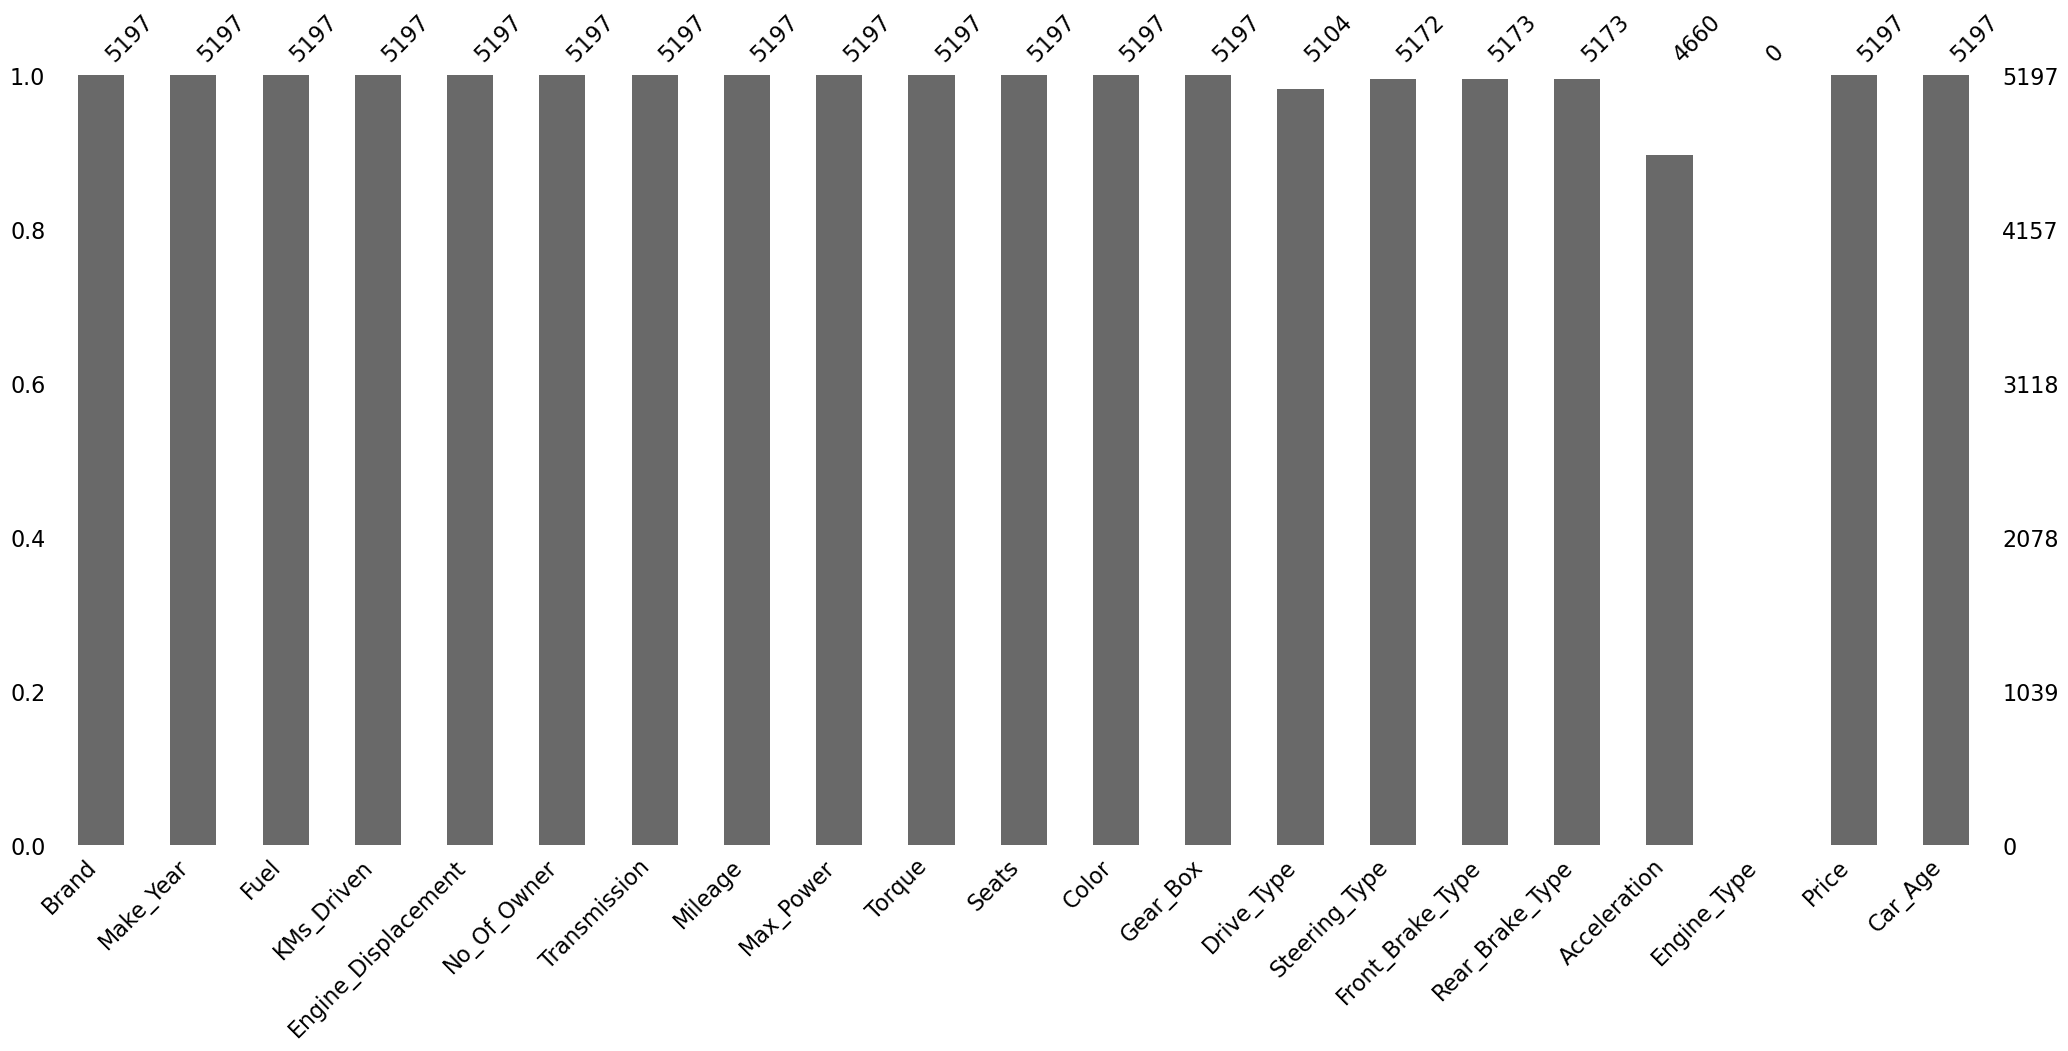

In [457]:
# Visualize missing data
msno.bar(Data)  # This shows the number of missing data per column

In [458]:
# Check for null values
null_counts = Data.isnull().sum()
print(null_counts[null_counts > 0])  # Print only columns with null values


Drive_Type            93
Steering_Type         25
Front_Brake_Type      24
Rear_Brake_Type       24
Acceleration         537
Engine_Type         5197
dtype: int64


In [459]:
# Identify numeric and categorical columns
numeric_columns = Data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = Data.select_dtypes(include=['object']).columns



In [460]:
numeric_columns

Index(['Make_Year', 'KMs_Driven', 'Engine_Displacement', 'Mileage',
       'Max_Power', 'Seats', 'Price', 'Car_Age'],
      dtype='object')

In [461]:
# Numeric imputation (using median for numeric columns)
numeric_imputer = SimpleImputer(strategy='median')
Data[numeric_columns] = pd.DataFrame(numeric_imputer.fit_transform(Data[numeric_columns]), columns=numeric_columns)


In [462]:
Data = pd.DataFrame(Data)

In [463]:
# Identify categorical columns (either 'object' or 'category' type)
categorical_columns = Data.select_dtypes(include=['object', 'category']).columns

In [464]:
categorical_columns

Index(['Brand', 'Fuel', 'No_Of_Owner', 'Transmission', 'Torque', 'Color',
       'Gear_Box', 'Drive_Type', 'Steering_Type', 'Front_Brake_Type',
       'Rear_Brake_Type', 'Acceleration', 'Engine_Type'],
      dtype='object')

In [465]:
# Categorical imputation (using mode for categorical columns)
categorical_imputer = SimpleImputer(strategy='most_frequent')

In [466]:
# Fit and transform the categorical columns with the imputer
imputed_categorical_data = categorical_imputer.fit_transform(Data[categorical_columns])

In [467]:
# Check the shape of the imputed data and the categorical columns
print(f"Shape of categorical_columns: {Data[categorical_columns].shape}")
print(f"Shape of imputed_categorical_data: {imputed_categorical_data.shape}")

Shape of categorical_columns: (5197, 13)
Shape of imputed_categorical_data: (5197, 12)


In [468]:
# Ensure the columns match between the original DataFrame and the imputed data
if imputed_categorical_data.shape[1] == len(categorical_columns):
    # If the column count matches, convert the imputed data back to DataFrame
    imputed_df = pd.DataFrame(imputed_categorical_data, columns=categorical_columns, index=Data.index)
    
    # Assign back to the DataFrame
    Data[categorical_columns] = imputed_df
else:
    print("Column mismatch detected. Inspect the following:")
    print("Columns in categorical_columns:", categorical_columns)
    print("Columns in imputed_categorical_data:", imputed_categorical_data.shape[1])
    print("Columns in original DataFrame:", Data.columns)

# Check the updated DataFrame to ensure missing values have been imputed
print(Data)

Column mismatch detected. Inspect the following:
Columns in categorical_columns: Index(['Brand', 'Fuel', 'No_Of_Owner', 'Transmission', 'Torque', 'Color',
       'Gear_Box', 'Drive_Type', 'Steering_Type', 'Front_Brake_Type',
       'Rear_Brake_Type', 'Acceleration', 'Engine_Type'],
      dtype='object')
Columns in imputed_categorical_data: 12
Columns in original DataFrame: Index(['Brand', 'Make_Year', 'Fuel', 'KMs_Driven', 'Engine_Displacement',
       'No_Of_Owner', 'Transmission', 'Mileage', 'Max_Power', 'Torque',
       'Seats', 'Color', 'Gear_Box', 'Drive_Type', 'Steering_Type',
       'Front_Brake_Type', 'Rear_Brake_Type', 'Acceleration', 'Engine_Type',
       'Price', 'Car_Age'],
      dtype='object')
                               Brand  Make_Year    Fuel  KMs_Driven  \
950            Maruti Swift LDI BSIV     2015.0  Diesel     82966.0   
951             Ford Figo Diesel ZXI     2015.0  Diesel     70000.0   
952   Maruti S-Cross 2017-2020 Alpha     2017.0  Diesel     35000.0   

In [469]:
Data.isnull().sum()

Brand                     0
Make_Year               950
Fuel                      0
KMs_Driven              950
Engine_Displacement     950
No_Of_Owner               0
Transmission              0
Mileage                 950
Max_Power               950
Torque                    0
Seats                   950
Color                     0
Gear_Box                  0
Drive_Type               93
Steering_Type            25
Front_Brake_Type         24
Rear_Brake_Type          24
Acceleration            537
Engine_Type            5197
Price                   950
Car_Age                 950
dtype: int64

In [470]:
# Convert selected columns to 'category' type
categorical_columns = ['Brand', 'Fuel', 'Transmission', 'Color', 'Gear_Box', 'Drive_Type', 
                       'Steering_Type', 'Front_Brake_Type', 'Rear_Brake_Type', 'Engine_Type']
Data[categorical_columns] = Data[categorical_columns].astype('category')


In [471]:
print("Categorical Columns:", categorical_columns)
print("Data Columns:", Data.columns.tolist())

Categorical Columns: ['Brand', 'Fuel', 'Transmission', 'Color', 'Gear_Box', 'Drive_Type', 'Steering_Type', 'Front_Brake_Type', 'Rear_Brake_Type', 'Engine_Type']
Data Columns: ['Brand', 'Make_Year', 'Fuel', 'KMs_Driven', 'Engine_Displacement', 'No_Of_Owner', 'Transmission', 'Mileage', 'Max_Power', 'Torque', 'Seats', 'Color', 'Gear_Box', 'Drive_Type', 'Steering_Type', 'Front_Brake_Type', 'Rear_Brake_Type', 'Acceleration', 'Engine_Type', 'Price', 'Car_Age']


In [472]:
imputed_categorical_data = categorical_imputer.fit_transform(Data[categorical_columns])
print("Shape of imputed categorical data:", imputed_categorical_data.shape)

Shape of imputed categorical data: (5197, 9)


In [473]:
if imputed_categorical_data.shape[1] == len(categorical_columns):
    Data[categorical_columns] = imputed_categorical_data
else:
       print("Column mismatch detected.")

Column mismatch detected.


In [474]:
empty_columns = Data[categorical_columns].isnull().all()
print("Empty Columns:", empty_columns[empty_columns].index.tolist())

Empty Columns: ['Engine_Type']


In [475]:
Data.drop(columns=['Engine_Type'], inplace=True)

In [476]:
from sklearn.impute import SimpleImputer

# Identify categorical columns
categorical_columns = Data.select_dtypes(include=['object', 'category']).columns

# Categorical imputation (using mode for categorical columns)
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the categorical columns with the imputer
imputed_categorical_data = categorical_imputer.fit_transform(Data[categorical_columns])

# Check the shape of the imputed data and the categorical columns
print(f"Shape of categorical_columns: {Data[categorical_columns].shape}")
print(f"Shape of imputed_categorical_data: {imputed_categorical_data.shape}")

# Ensure the columns match between the original DataFrame and the imputed data
if imputed_categorical_data.shape[1] == len(categorical_columns):
    # If the column count matches, convert the imputed data back to DataFrame
    imputed_df = pd.DataFrame(imputed_categorical_data, columns=categorical_columns, index=Data.index)
    
    # Assign back to the DataFrame
    Data[categorical_columns] = imputed_df
else:
    print("Column mismatch detected. Inspect the following:")
    print("Columns in categorical_columns:", categorical_columns)
    print("Columns in imputed_categorical_data:", imputed_categorical_data.shape[1])
    print("Columns in original DataFrame:", Data.columns)

Shape of categorical_columns: (5197, 12)
Shape of imputed_categorical_data: (5197, 12)


In [477]:
Data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5197 entries, 950 to 6146
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                5197 non-null   object 
 1   Make_Year            4247 non-null   float64
 2   Fuel                 5197 non-null   object 
 3   KMs_Driven           4247 non-null   float64
 4   Engine_Displacement  4247 non-null   float64
 5   No_Of_Owner          5197 non-null   object 
 6   Transmission         5197 non-null   object 
 7   Mileage              4247 non-null   float64
 8   Max_Power            4247 non-null   float64
 9   Torque               5197 non-null   object 
 10  Seats                4247 non-null   float64
 11  Color                5197 non-null   object 
 12  Gear_Box             5197 non-null   object 
 13  Drive_Type           5197 non-null   object 
 14  Steering_Type        5197 non-null   object 
 15  Front_Brake_Type     5197 non-null  

In [478]:
Data.shape

(5197, 20)

In [479]:
#Checking Available Columns

Data.columns

Index(['Brand', 'Make_Year', 'Fuel', 'KMs_Driven', 'Engine_Displacement',
       'No_Of_Owner', 'Transmission', 'Mileage', 'Max_Power', 'Torque',
       'Seats', 'Color', 'Gear_Box', 'Drive_Type', 'Steering_Type',
       'Front_Brake_Type', 'Rear_Brake_Type', 'Acceleration', 'Price',
       'Car_Age'],
      dtype='object')

In [480]:
# Check for missing values 
print(Data.isnull().sum())

Brand                    0
Make_Year              950
Fuel                     0
KMs_Driven             950
Engine_Displacement    950
No_Of_Owner              0
Transmission             0
Mileage                950
Max_Power              950
Torque                   0
Seats                  950
Color                    0
Gear_Box                 0
Drive_Type               0
Steering_Type            0
Front_Brake_Type         0
Rear_Brake_Type          0
Acceleration             0
Price                  950
Car_Age                950
dtype: int64


In [481]:
   from sklearn.impute import SimpleImputer

   # Impute numerical columns with median
   numeric_imputer = SimpleImputer(strategy='median')
   Data[['Make_Year', 'KMs_Driven', 'Mileage', 'Max_Power', 'Seats', 'Price', 'Car_Age']] = numeric_imputer.fit_transform(Data[['Make_Year', 'KMs_Driven', 'Mileage', 'Max_Power', 'Seats', 'Price', 'Car_Age']])

   # Impute categorical columns with mode
   categorical_imputer = SimpleImputer(strategy='most_frequent')
   Data[['Engine_Displacement', 'Transmission']] = categorical_imputer.fit_transform(Data[['Engine_Displacement', 'Transmission']])

In [482]:
# Remove duplicates
Data = Data.drop_duplicates()


In [483]:
#Handling Missing Data

In [484]:
# Check for missing values 
print(Data.isnull().sum())


Brand                  0
Make_Year              0
Fuel                   0
KMs_Driven             0
Engine_Displacement    0
No_Of_Owner            0
Transmission           0
Mileage                0
Max_Power              0
Torque                 0
Seats                  0
Color                  0
Gear_Box               0
Drive_Type             0
Steering_Type          0
Front_Brake_Type       0
Rear_Brake_Type        0
Acceleration           0
Price                  0
Car_Age                0
dtype: int64


In [485]:
Data1 = Data

Now we dont have any missing Values. Let us proceed with the next step. Let us proceed with visualizing our new Data.

In [486]:
Data1.columns

Index(['Brand', 'Make_Year', 'Fuel', 'KMs_Driven', 'Engine_Displacement',
       'No_Of_Owner', 'Transmission', 'Mileage', 'Max_Power', 'Torque',
       'Seats', 'Color', 'Gear_Box', 'Drive_Type', 'Steering_Type',
       'Front_Brake_Type', 'Rear_Brake_Type', 'Acceleration', 'Price',
       'Car_Age'],
      dtype='object')

In [487]:
# Exploratory Data Analysis (EDA) New Data

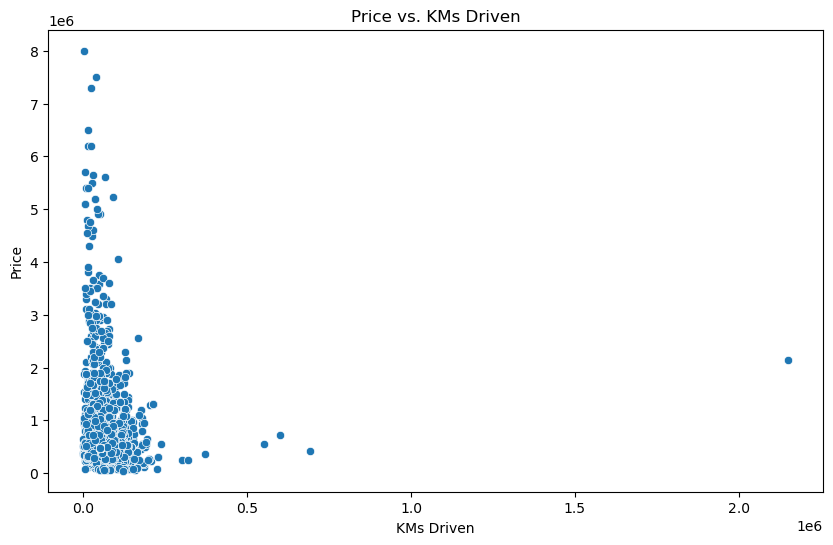

In [488]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Price vs. KMs_Driven
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Data1, x='KMs_Driven', y='Price')
plt.title('Price vs. KMs Driven')
plt.xlabel('KMs Driven')
plt.ylabel('Price')
plt.show()


Observation: There is a clear negative correlation between KMs_Driven and Price. As the number of kilometers driven increases, the price of the car tends to decrease.

Implication: This suggests that higher usage (more kilometers) typically leads to lower resale value, which is consistent with the general understanding of car depreciation.

Outliers: Some cars with high kilometers driven still have high prices, indicating that factors such as brand, condition, or unique features can significantly influence price.


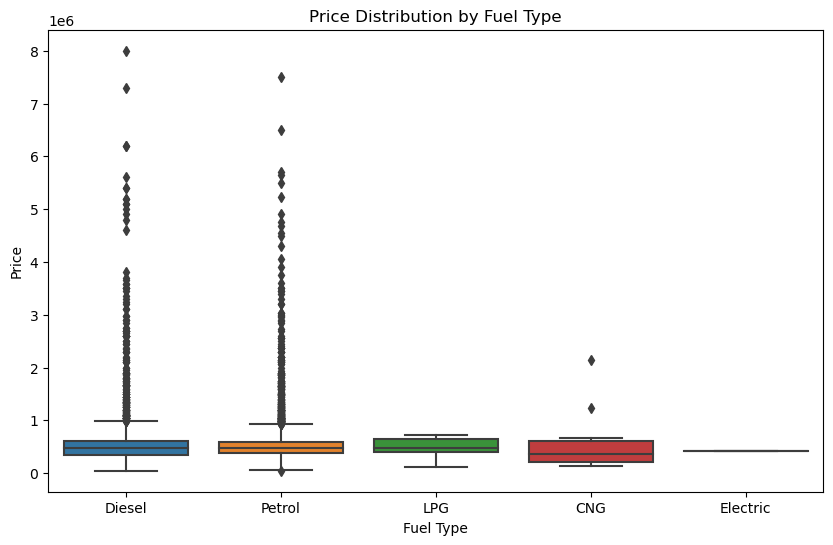

In [489]:

# Box plot for Price by Fuel Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=Data1, x='Fuel', y='Price')
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

Observation: The median price varies significantly across different fuel types. For example, petrol and diesel vehicles may have higher median prices compared to CNG or LPG vehicles.

Spread of Prices: The interquartile ranges (IQR) show that the price distribution for certain fuel types has a wider spread, indicating variability in prices within those categories.

Outliers: There are notable outliers in some fuel types, suggesting that certain vehicles command significantly higher prices, possibly due to brand reputation or special features.


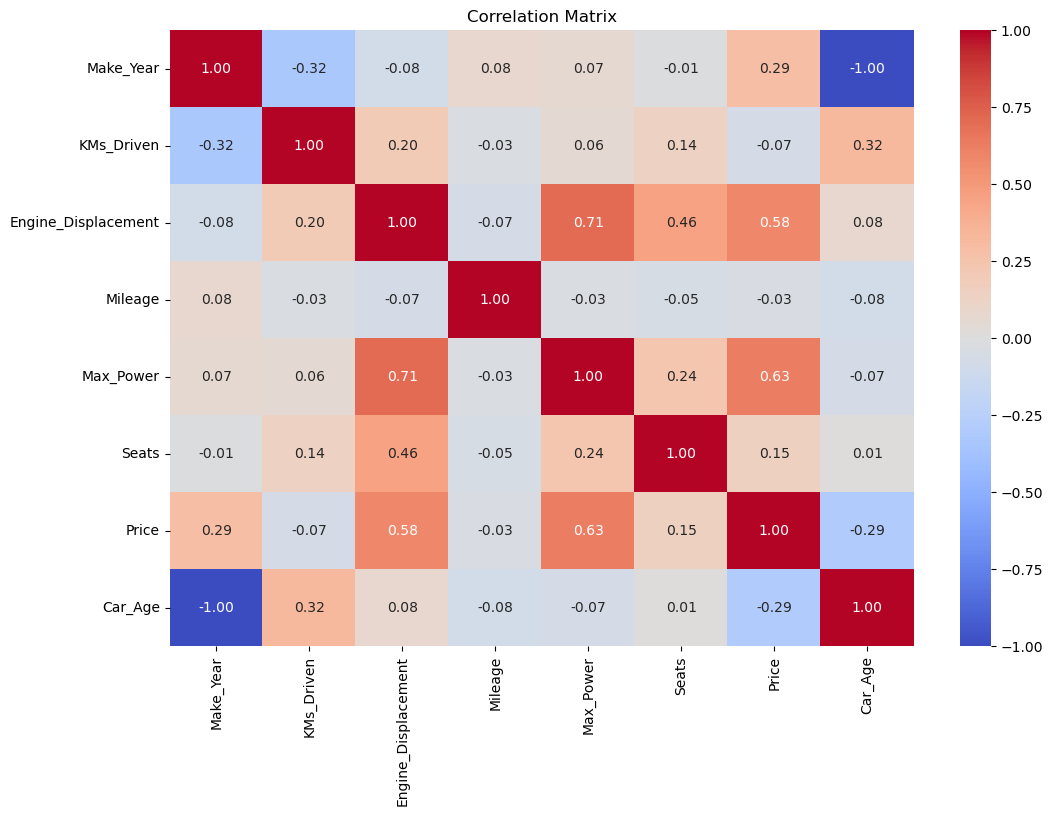

In [490]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = Data1.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Observation: Strong positive correlations are observed between features such as Engine_Displacement and Max_Power, indicating that larger engines generally produce more power.

Negative Correlation: A strong negative correlation exists between Car_Age and Price, confirming that older cars tend to have lower prices.

Low Correlation Features: Features like Seats and Torque show low correlation with Price, suggesting they may not significantly impact the target variable.

 Feature Engineering

In [491]:
# Create new features
Data1['Car_Age'] = 2024 - Data1['Make_Year']  # Assuming the current year is 2024
Data1['Price_per_Km'] = Data1['Price'] / Data1['KMs_Driven'].replace(0, np.nan)  # Avoid division by zero


3. ***FEATURE SELECTION***

In [492]:
# Check for null values in the Make_Year column
if Data['Make_Year'].isnull().sum() > 0:
    # Handling null values by filling them with the median year (as an example)
    Data['Make_Year'].fillna(Data['Make_Year'].median(), inplace=True)

# Convert Make_Year to integer type
Data['Make_Year'] = Data['Make_Year'].astype(int)


 Before converting columns like Make_Year to int, handle any missing values, as nulls will cause conversion errors.

In [493]:
# Identifying categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Applying one-hot encoding on categorical features
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)


In [494]:
# Checking for any remaining missing values in X
if X.isnull().sum().any():
    print("Missing values detected. Filling missing values with the mean.")
    X.fillna(X.mean(), inplace=True)  # Fill missing values with column mean as an example


Explanation: Ensure no missing values are present in X before fitting the model. Here, we fill any remaining nulls with the mean, but other methods like median imputation may be more suitable depending on the data.

Feature Importance with Random Forest (to Identify Key Predictors)

Using RandomForestRegressor to assess feature importance provides insight into which features are most influential for price prediction.

In [495]:
from sklearn.ensemble import RandomForestRegressor
importances = model.feature_importances_

# Create a DataFrame to view the feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top features
print(feature_importances.head(10))  # View the top 10 features


                              Feature  Importance
4                           Max_Power    0.489525
8                        Price_per_Km    0.330308
1                          KMs_Driven    0.069964
2                 Engine_Displacement    0.043832
1163  Brand_Toyota Corolla Altis D-4D    0.009845
0                           Make_Year    0.008013
7                             Car_Age    0.006795
3                             Mileage    0.005455
5                              Torque    0.003571
1398                Acceleration_11.8    0.003155


Top 10 Features by Importance:
                              Feature  Importance
4                           Max_Power    0.492049
7                        Price_per_Km    0.329215
1                          KMs_Driven    0.067694
2                 Engine_Displacement    0.042242
1162  Brand_Toyota Corolla Altis D-4D    0.009443
3                             Mileage    0.007597
6                             Car_Age    0.007521
0                           Make_Year    0.007400
702      Brand_MG Hector Hybrid Sharp    0.002683
1630                Acceleration_11.8    0.002640


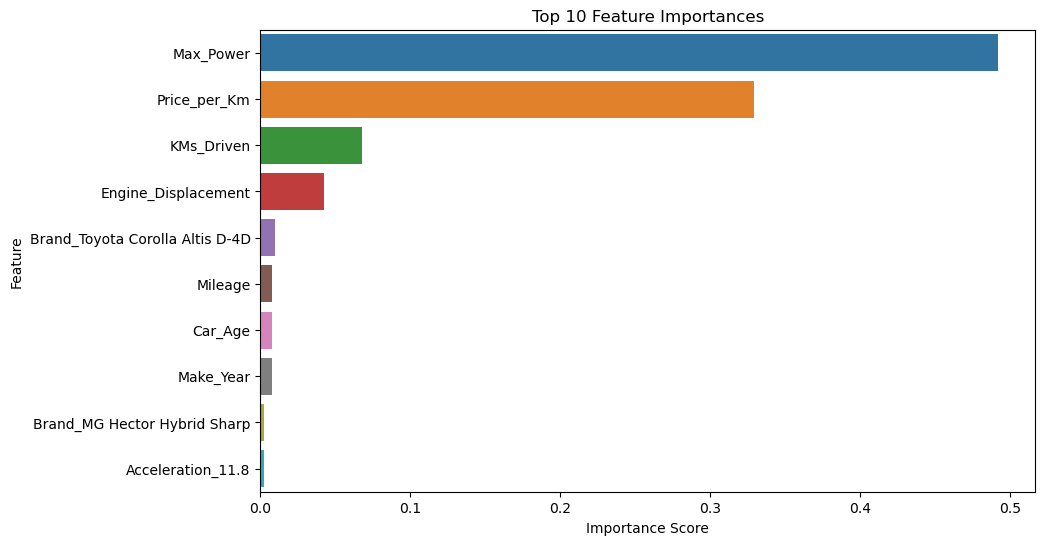

MAE: 50404.98741617357
MSE: 47911313373.00666
R-squared: 0.8745294771064622


In [496]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'Data' is our DataFrame and 'Price' is our target variable
# Prepare our features (X) and target (y)
X = Data.drop('Price', axis=1)  # Features
y = Data['Price']                # Target variable

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Calculate feature importances
importances = model.feature_importances_

# Create a DataFrame to view the feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top features
print("Top 10 Features by Importance:")
print(feature_importances.head(10))  # View the top 10 features

# Visualize the top features
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances.head(10), x='Importance', y='Feature')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Evaluate the model
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

4. ***MODEL DEVELOPMENT***

In [497]:
#Data Preprocessing and Scaling 
#Why: Some algorithms, especially those sensitive to feature scaling (like linear regression, SVMs, or neural networks), require features to be scaled or normalized for optimal performance. Even though RandomForestRegressor doesn’t require scaling, it’s good practice to ensure all features are ready in case other algorithms are evaluated.
# Actions: Standardize or normalize numeric features if necessary.

In [498]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Apply scaler only to numeric columns
X_top_scaled = scaler.fit_transform(X_top)


In [499]:
# Check the cleaned data
Data1.head()

,Brand,Make_Year,Fuel,KMs_Driven,Engine_Displacement,No_Of_Owner,Transmission,Mileage,Max_Power,Torque,...,Color,Gear_Box,Drive_Type,Steering_Type,Front_Brake_Type,Rear_Brake_Type,Acceleration,Price,Car_Age,Price_per_Km
950,Maruti Swift LDI BSIV,2015,Diesel,82966.0,1373.0,First,Manual,18.70,88.7,190,...,White,5,FWD,Power,Ventilated Disc,Drum,14.8,595000.0,9.0,7.171612
951,Ford Figo Diesel ZXI,2015,Diesel,70000.0,2967.0,Second,Manual,15.97,258.0,160,...,Grey,5,FWD,Power,Ventilated Disc,Drum,14.8,2600000.0,9.0,37.142857
952,Maruti S-Cross 2017-2020 Alpha,2017,Diesel,35000.0,1999.0,First,Manual,14.21,203.0,200,...,Silver,5,FWD,Power,Discs,Discs,13.42,5200000.0,7.0,148.571429
953,Hyundai i20 Active 1.4,2016,Diesel,7000.0,1199.0,First,Manual,21.43,87.2,220,...,White,6,FWD,Power,Discs,Drum,15,625000.0,8.0,89.285714
954,Hyundai i20 1.4 CRDi,2015,Diesel,48000.0,2993.0,First,Manual,16.73,218.0,22.4,...,White,6,FWD,Power,Discs,Drum,12.96,3590000.0,9.0,74.791667


 Train-Test Split or Cross-Validation Setup

Why: Splitting data into training, validation, and test sets (or using cross-validation) gives an accurate measure of the model’s performance and prevents overfitting.


In [500]:
from sklearn.model_selection import train_test_split, cross_val_score

# Split into train/test for holdout evaluation
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)


Here, we split X_top (our feature matrix with only the top features) and y (the target variable) into training and testing sets. This ensures the model is trained on one portion of the data and evaluated on another for unbiased performance metrics.

In [501]:
#Feature Engineering and Interaction Terms

#Adding an engineered feature
X_top['mileage_per_year'] = X_top['Mileage'] / (2024 - X_top['Make_Year'])


1. **Modeling for Optimal Pricing (Regression)**


To predict the optimal price for a used car based on features such as Brand, Model, KMs_Driven, Make_Year, and more.

Steps:

*Feature Selection:* Choose relevant features for pricing prediction (you might want to remove highly correlated features or irrelevant columns).

*Splitting Data:* Splitting data into training and test sets (typically an 80/20 or 70/30 split).

*Modeling:* Starting with a basic regression model and gradually improve it.

*Linear Regression:* Formulate a good baseline to understand relationships between variables.

*Random Forest/Decision Trees:* For capturing non-linear relationships.

*XGBoost/LightGBM:* More advanced model to handle complex data well and often give better results.

*Evaluation:* Use of metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² to evaluate the model's performance.

In [502]:
# Initialize the model
model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [503]:
# Check for missing data in X_train
print(X_train.isnull().sum())


Max_Power                          0
Price_per_Km                       0
KMs_Driven                         0
Engine_Displacement                0
Car_Age                            0
Make_Year                          0
Mileage                            0
Brand_Toyota Corolla Altis D-4D    0
Torque                             0
Acceleration                       0
mileage_per_year                   0
dtype: int64


4.1. Splitting Data into Training and Test Sets

In [504]:
# Define the features (X) and target variable (y)
X = Data.drop(columns=['Price'])
y = Data['Price']

# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting sets
print(X_train.shape, X_test.shape)


(4052, 20) (1014, 20)


In [505]:
Data.columns

Index(['Brand', 'Make_Year', 'Fuel', 'KMs_Driven', 'Engine_Displacement',
       'No_Of_Owner', 'Transmission', 'Mileage', 'Max_Power', 'Torque',
       'Seats', 'Color', 'Gear_Box', 'Drive_Type', 'Steering_Type',
       'Front_Brake_Type', 'Rear_Brake_Type', 'Acceleration', 'Price',
       'Car_Age', 'Price_per_Km'],
      dtype='object')

4.2. Baseline Linear Regression

In [506]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'Data' is our DataFrame
# Check data types first
print(Data.dtypes)


Brand                   object
Make_Year                int32
Fuel                    object
KMs_Driven             float64
Engine_Displacement    float64
No_Of_Owner             object
Transmission            object
Mileage                float64
Max_Power              float64
Torque                  object
Seats                  float64
Color                   object
Gear_Box                object
Drive_Type              object
Steering_Type           object
Front_Brake_Type        object
Rear_Brake_Type         object
Acceleration            object
Price                  float64
Car_Age                float64
Price_per_Km           float64
dtype: object


In [507]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align the columns of X_test with X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

Start with a basic regression model and gradually improve it.

Linear Regression: Formulate a good baseline to understand relationships between variables.

In [518]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
print("Linear Regression - MAE:", mean_absolute_error(y_test, y_pred_linear))
print("Linear Regression - MSE:", mean_squared_error(y_test, y_pred_linear))
print("Linear Regression - R²:", r2_score(y_test, y_pred_linear))

Linear Regression - MAE: 256330.26784594406
Linear Regression - MSE: 205441461683.61182
Linear Regression - R²: 0.4619882903068524


Random Forest Regressor

For capturing non-linear relationships.

In [519]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest - MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest - MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest - R²:", r2_score(y_test, y_pred_rf))

Random Forest - MAE: 50404.98741617357
Random Forest - MSE: 47911313373.00666
Random Forest - R²: 0.8745294771064622


XGBoost Regressor

More advanced model to handle complex data well and often give better results.

In [520]:
import xgboost as xgb

# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost - MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("XGBoost - MSE:", mean_squared_error(y_test, y_pred_xgb))
print("XGBoost - R²:", r2_score(y_test, y_pred_xgb))

XGBoost - MAE: 45052.2966554179
XGBoost - MSE: 39455383376.37463
XGBoost - R²: 0.8966739328421784


Evaluation

Using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² to evaluate the model's performance.

In [521]:
# Summary of evaluation metrics
print("Evaluation Metrics:")
print("Linear Regression - MAE:", mean_absolute_error(y_test, y_pred_linear))
print("Linear Regression - MSE:", mean_squared_error(y_test, y_pred_linear))
print("Linear Regression - R²:", r2_score(y_test, y_pred_linear))

print("Random Forest - MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest - MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest - R²:", r2_score(y_test, y_pred_rf))

print("XGBoost - MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("XGBoost - MSE:", mean_squared_error(y_test, y_pred_xgb))
print("XGBoost - R²:", r2_score(y_test, y_pred_xgb))

Evaluation Metrics:
Linear Regression - MAE: 256330.26784594406
Linear Regression - MSE: 205441461683.61182
Linear Regression - R²: 0.4619882903068524
Random Forest - MAE: 50404.98741617357
Random Forest - MSE: 47911313373.00666
Random Forest - R²: 0.8745294771064622
XGBoost - MAE: 45052.2966554179
XGBoost - MSE: 39455383376.37463
XGBoost - R²: 0.8966739328421784
